In [1]:
# Plotly Express -> Plotly Graph Objects (what Seabors is to Matplotlib)
    # Use px.plot_type for quick plotting
    # Using fig = px.plot_type... + fig.update_layout, fig.update_traces for more customization
        # fig = px.bar(df_eu, x='country', y='pop', text='pop')
        # fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
        # fig.update_layout(uniformtext_minsize=8, xaxis_tickangle=-45)
    # 'IPLOT' is Pandas backend - to use DF.iplot() vs. px.plot(DF)
        # takes 'kind' parameter, same as DF.plot(kind='')
    # DONT REALLY SEE THE NEED TO USE GO FIGURE OBJECT DIRECTLY

In [2]:
!Jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.1.4
qtconsole        : 4.7.7
ipython          : 7.19.0
ipykernel        : 5.3.4
jupyter client   : 6.1.7
jupyter lab      : 2.2.6
nbconvert        : 6.0.7
ipywidgets       : 7.5.1
nbformat         : 5.0.8
traitlets        : 5.0.5


In [3]:
import pandas as pd
import numpy as np 

# Scipy 2021 Presentation (cleanest usage)
* https://github.com/nicolaskruchten/scipy2021
* https://www.youtube.com/watch?v=FpCgG85g2Hw&t=244s

In [4]:
import plotly.express as px

In [7]:
px.data.gapminder().head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

In [8]:
df = px.data.gapminder().query('year==2007')
df.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

In [12]:
#Univariate
px.strip(df, x='lifeExp', hover_name='country', color='continent')

In [13]:
px.histogram(df, x='lifeExp', hover_name='country', color='continent', marginal='rug', y='pop')

In [14]:
px.histogram(df, x='lifeExp', hover_name='country', color='continent', marginal='rug', facet_col='continent')  #facet_col

In [18]:
px.bar(df, x='continent', y='pop', color='lifeExp', hover_name='country')

In [19]:
#Part to whole relationship -> person-> country-> continent
px.sunburst(df, values='pop', path=['continent', 'country'], color='lifeExp')

In [20]:
#TreeMap
px.treemap(df, values='pop', path=['continent', 'country'], color='lifeExp')

In [21]:
px.choropleth(df, color='lifeExp', locations ='iso_alpha', hover_name='country')

In [22]:
# Multi-variate
px.scatter(df, y='lifeExp', x='gdpPercap', hover_name='country', size='pop', size_max=60, log_x=True, color='continent')

In [33]:
fig = px.scatter(df, y='lifeExp', x='gdpPercap', hover_name='country', size='pop', size_max=60, log_x=True, color='continent')

# cannot render json file in Jupyter Notebook
# fig.show('json')
print(fig)

Figure({
    'data': [{'hovertemplate': ('<b>%{hovertext}</b><br><br>con' ... '=%{marker.size}<extra></extra>'),
              'hovertext': array(['Afghanistan', 'Bahrain', 'Bangladesh', 'Cambodia', 'China',
                                  'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
                                  'Japan', 'Jordan', 'Korea, Dem. Rep.', 'Korea, Rep.', 'Kuwait',
                                  'Lebanon', 'Malaysia', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
                                  'Pakistan', 'Philippines', 'Saudi Arabia', 'Singapore', 'Sri Lanka',
                                  'Syria', 'Taiwan', 'Thailand', 'Vietnam', 'West Bank and Gaza',
                                  'Yemen, Rep.'], dtype=object),
              'legendgroup': 'Asia',
              'marker': {'color': '#636efa',
                         'size': array([  31889923,     708573,  150448339,   14131858, 1318683096,    6980412,
                                   

In [26]:
fig = px.scatter(df, y="lifeExp", x="gdpPercap", color="continent", log_x=True, size="pop", size_max=60,
                 hover_name="country", height=600, width=1000, template="simple_white", 
                 color_discrete_sequence=px.colors.qualitative.G10,
                 title="Health vs Wealth 2007",
                 labels=dict(
                     continent="Continent", pop="Population",
                     gdpPercap="GDP per Capita (US$, price-adjusted)", 
                     lifeExp="Life Expectancy (years)"))

fig.update_layout(font_family="Rockwell",
                  legend=dict(orientation="h", title="", y=1.1, x=1, xanchor="right", yanchor="bottom"))
fig.update_xaxes(tickprefix="$", range=[2,5], dtick=1)
fig.update_yaxes(range=[30,90])
fig.add_hline((df["lifeExp"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.add_vline((df["gdpPercap"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.show()
# fig.write_html("gapminder_2007.html") # interactive export

In [31]:
import xarray as xr
airtemps = xr.tutorial.open_dataset('air_temperature').air.sel(lon=250.0)
airtemps.T.head()

<xarray.DataArray 'air' (lat: 5, time: 5)>
array([[246.5    , 244.     , 242.2    , 239.79999, 239.29999],
       [242.     , 241.59999, 239.59999, 236.09999, 236.     ],
       [240.39   , 240.59999, 239.89   , 238.5    , 238.7    ],
       [242.7    , 244.09999, 243.79999, 243.59999, 242.89   ],
       [247.29999, 249.2    , 248.89   , 248.29999, 248.29999]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0
    lon      float32 250.0
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ... 2013-01-02
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [32]:
fig = px.imshow(airtemps.T, origin='lower')
fig.show()

In [41]:
df = px.data.wind()
display(df.head())
display(df.dtypes)
px.bar_polar(df, r="frequency", theta="direction", height=600,
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)

direction strength  frequency
0         N      0-1        0.5
1       NNE      0-1        0.6
2        NE      0-1        0.5
3       ENE      0-1        0.4
4         E      0-1        0.4

direction     object
strength      object
frequency    float64
dtype: object

In [42]:
df = px.data.iris()
px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)

In [52]:
df = px.data.election()
display(df.sort_values(by='district').head())
px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron", color="winner", size="total", hover_name="district",
                   size_max=15, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"} )


district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112

In [44]:
df = px.data.election()
px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})

In [45]:
# Dont show up the dash-app in jupyter
# from jupyter_dash import JupyterDash
# from dash import html
# from dash import dcc
# from dash.dependencies import Input, Output
# import plotly.express as px
# df = px.data.gapminder()

# app = JupyterDash(__name__)

# app.layout = html.Div(children = [
#  dcc.Dropdown(id="year", value=2007, clearable=False,
#    options=[{"label": y, "value": y} for y in df['year'].unique()]),
#  dcc.Graph(id="graph", figure={})
#])

# @app.callback(Output('graph', 'figure'), Input('year', 'value'))
# def cb(year):
#    df_year = df.query("year == @year")
#    return px.scatter(df_year, x="gdpPercap", y="lifeExp", size="pop",
#          log_x=True, size_max=60, hover_name="country", height=400)

# app.run_server(mode="jupyterlab")

# Udemy notes - mainly using iplot (not the best approach)

In [82]:
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
%matplotlib inline

# to make things work offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot
init_notebook_mode(connected=True)
cf.go_offline()

In [47]:
df1 = pd.DataFrame(np.random.randn(100,4), columns=list('abcd'))
df1.head()

a         b         c         d
0  1.659025 -1.022897 -0.070302 -0.125149
1  1.667537  0.604144 -0.696209  0.058812
2  2.187429 -0.576786 -0.745833 -0.186267
3  0.526658 -0.878109 -0.200362 -1.680019
4 -2.215485 -0.335390 -0.342751 -0.319817

<AxesSubplot:>

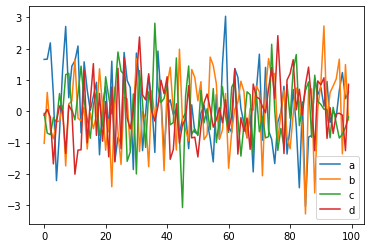

In [60]:
df1.plot()

In [49]:
df1.iplot()

In [50]:
df1.iplot(kind='scatter', x='a', y='b', mode='markers', xTitle='A', yTitle='B') #mode=markers to get dots instead of lines

In [67]:
df1.sum().iplot(kind='bar')

In [69]:
df1.iplot(kind='box')

In [70]:
df1.iplot(kind='hist', bins=10)

In [72]:
df3 = pd.DataFrame({'Strike':[1,2,3,4,5],'Price':[1,2,3,4,5], 'Maturity':[1,2,3,4,5]})
display(df3.head())
df3.iplot(kind='surface')

Strike  Price  Maturity
0       1      1         1
1       2      2         2
2       3      3         3
3       4      4         4
4       5      5         5

In [74]:
df1['a'] = df1['a']+3
df1['b'] = df1['b']+2
df1_edit = df1[['a','b']]
df1_edit.iplot(kind='spread',colors=['green','red'])       #Unclear on the why both +/- spreads are shown for same pair

C:\Users\uditg\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\uditg\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [78]:
df1.iplot(kind='bubble', x='a', y='b', size='c')

In [75]:
df1.scatter_matrix()  #similar to Seaborn pairplot

## Choropleth Maps - use above approach instead! this is unnecessarily complicated

In [86]:
import plotly.graph_objects as go

# Create DATA and LAYOUT objects
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
#             colorscale= 'Portland',  
#             text= ['text1','text2','text3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Colorbar Title'})

layout = dict(geo = {'scope':'usa'})

In [87]:
choromap = go.Figure(data = data, layout = layout)
choromap.show()

In [92]:
path ='C:\\Users\\uditg\\Documents\\GitHub\\Udemy-Python-for-DS\\09-Geographical-Plotting\\'
dfagri = pd.read_csv(path+'2011_US_AGRI_Exports')
display(dfagri.head(2))

data = dict(type='choropleth',
           colorscale='sunset',
           locations=dfagri['code'],
           locationmode = 'USA-states',
           z = dfagri['total exports'],
           text = dfagri['text'],
           colorbar = {'title':'Millions USD'},
           marker = dict(line = dict(color='white', width=1)
                        )
           )
layout = dict(title='2011 US Agri Exports',
             geo = dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'))

choromap = go.Figure(data = [data],layout = layout)
choromap.show()

code    state category  total exports  beef  pork  poultry  dairy  \
0   AL  Alabama    state        1390.63  34.4  10.6    481.0   4.06   
1   AK   Alaska    state          13.31   0.2   0.1      0.0   0.19   

   fruits fresh  fruits proc  total fruits  veggies fresh  veggies proc  \
0           8.0         17.1         25.11            5.5           8.9   
1           0.0          0.0          0.00            0.6           1.0   

   total veggies  corn  wheat  cotton  \
0          14.33  34.9   70.0  317.61   
1           1.56   0.0    0.0    0.00   

                                                text  
0  Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...  
1  Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...

In [91]:
dfgdp = pd.read_csv(path+'2014_World_GDP')
display(dfgdp.head(2))

data = dict(type='choropleth',
           colorscale='Jet',
           locations=dfgdp['CODE'],
#            locationmode = 'ISO-3',     # optional in this case!
           z = dfgdp['GDP (BILLIONS)'],
           text = dfgdp['COUNTRY'],
           colorbar = {'title':'$ Bn'},
           marker = dict(line = dict(color='white', width=1)
                        )
           )
layout = dict(title='2014 GDP',
             geo = dict(scope='world', 
                        showlakes=True,
                        lakecolor='rgb(85,173,240)',
                        projection={'type':'natural earth'}))

choromap = go.Figure(data = [data],layout = layout)
choromap.show()

COUNTRY  GDP (BILLIONS) CODE
0  Afghanistan           21.71  AFG
1      Albania           13.40  ALB

# Youtube Video - Derek Banas (switching b/w go.Figure vs. px.plot)
* https://www.youtube.com/watch?v=GGL6U0k8WYA

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_stocks = px.data.stocks()
df_stocks.head()

In [ ]:
# Line Chart

# For more complex graphs    ~ Object Oriented piece of Matplotlib
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks['date'], y=df_stocks['AAPL'], mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks['date'], y=df_stocks['AMZN'], mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks['date'], y=df_stocks['GOOG'], mode='lines+markers', name='Google', 
                         line={'color': 'firebrick', 'width': 2, 'dash': 'dashdot'}))
fig.update_layout(title='Stock Price Data', xaxis_title='Price', yaxis_title='Date')
fig.update_layout(xaxis=dict(showline=True, showgrid=False, showticklabels=True, 
                             linecolor='rgb(204,204,204)', linewidth=2,
                             ticks='outside',
                             tickfont=dict(family='Arial', size=12, color='rgb(82,82,82)')),
                  yaxis=dict(showline=False, showgrid=False, zeroline=False,
                             showticklabels=False),
                  autosize=False,
                  margin=dict(autoexpand=False, l=100, r=20, t=110),
                  showlegend=False, plot_bgcolor='white')

In [ ]:
#Bar Chart
df_us = px.data.gapminder().query('country=="United States"')
df_us.head()

In [ ]:
tips = px.data.tips()
px.bar(tips, x='day', y='tip', color='sex', title='Tips on Each Day', labels={'tip':'Tip Amount'}, barmode='group')

In [ ]:
df_eu = px.data.gapminder().query('continent=="Europe" and year == 2007 and pop > 2000000')
df_eu.head()

In [ ]:
# Clearner syntax
fig = px.bar(df_eu, x='country', y='pop', text='pop')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, xaxis_tickangle=-45)

In [ ]:
#Scatter plot
iris = px.data.iris()
px.scatter(iris, x='sepal_width', y='sepal_length', color='species', size='petal_length', hover_name='petal_width')

In [ ]:
# fig = go.Figure()
fig = px.scatter(iris, x='sepal_width', y='sepal_length', color='sepal_width', hover_name='species', )
fig.update_traces(marker_line_width=2, marker_size=10, marker=dict(showscale=True))
# fig.show()

In [ ]:
fig = px.scatter(x = np.random.randn(100000),y = np.random.randn(100000))
fig.update_traces(marker=dict(color=np.random.randn(100000),colorscale='Viridis',line_width=1))

In [58]:
colors = ['blue', 'green', 'black', 'purple', 'red', 'brown']
fig = px.pie(names=['Water','Grass','Normal','Psychic', 'Fire', 'Ground'], values=[110,90,80,80,70,60])
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  textinfo='label+percent', pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))